### 1、导包

In [3]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

### 2、加载数据

In [2]:
#加载人脸数据 labled faces wild
data = datasets.fetch_lfw_people(data_home='lfw_home',resize=1,min_faces_per_person=70)
data

{'data': array([[0.99607843, 0.99607843, 0.9986928 , ..., 0.38431373, 0.38039216,
         0.38039216],
        [0.16470589, 0.12941177, 0.1267974 , ..., 0.47843137, 0.5816994 ,
         0.7267974 ],
        [0.36862746, 0.28235295, 0.2901961 , ..., 0.7163399 , 0.7176471 ,
         0.71503276],
        ...,
        [0.35424837, 0.35686275, 0.35555556, ..., 0.19869281, 0.16993465,
         0.14640523],
        [0.19869281, 0.19869281, 0.19346406, ..., 0.6614379 , 0.61960787,
         0.4745098 ],
        [0.12287582, 0.13071896, 0.10457516, ..., 0.18954249, 0.24705882,
         0.3882353 ]], shape=(1288, 11750), dtype=float32),
 'images': array([[[0.99607843, 0.99607843, 0.9986928 , ..., 0.21699347,
          0.20261438, 0.20653595],
         [0.99607843, 0.9973857 , 0.99607843, ..., 0.22222222,
          0.20261438, 0.20653595],
         [0.9986928 , 0.9973857 , 0.99346405, ..., 0.2248366 ,
          0.20522876, 0.20522876],
         ...,
         [0.3150327 , 0.29542485, 0.2535948 , .

In [3]:
x = data['data']
y = data['target']
faces = data['images']
display(x.shape,y.shape,faces.shape)

(1288, 11750)

(1288,)

(1288, 125, 94)

(125, 94)

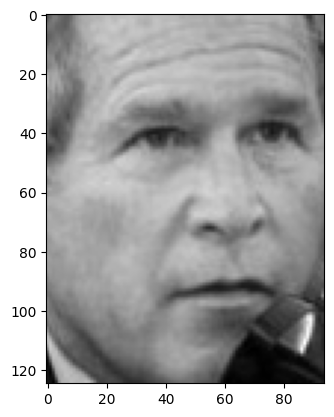

In [4]:
index = np.random.randint(0,1288,size=1)[0]
face = faces[index]
plt.imshow(face,cmap='gray')
display(face.shape)

array([[0.29934642, 0.33594772, 0.3882353 , ..., 0.4248366 , 0.40261438,
        0.38300654],
       [0.29934642, 0.351634  , 0.41568628, ..., 0.4130719 , 0.4013072 ,
        0.3869281 ],
       [0.33071896, 0.3882353 , 0.42352942, ..., 0.39477125, 0.4013072 ,
        0.37908497],
       ...,
       [0.07973856, 0.04313726, 0.11503268, ..., 0.07843138, 0.04836601,
        0.06013072],
       [0.0875817 , 0.05490196, 0.06143791, ..., 0.12156863, 0.10196079,
        0.07058824],
       [0.0875817 , 0.06666667, 0.02614379, ..., 0.11764706, 0.12941177,
        0.10588235]], shape=(125, 94), dtype=float32)

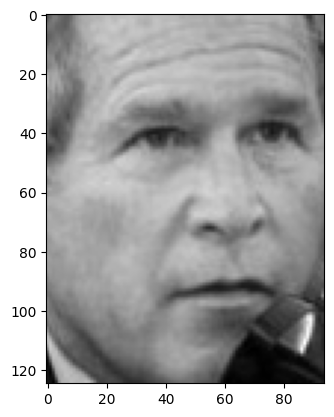

In [5]:
face = x[index].reshape(125,94)
display(face)
plt.imshow(face,cmap='gray')

In [6]:
target_names = data['target_names']
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [7]:
name = y[index]
print(target_names[name])

George W Bush


### 3、建模

In [30]:
%%time
x_train,x_test,y_train,y_test = train_test_split(x,y)
svc = SVC(C=1)
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

CPU times: total: 49.3 s
Wall time: 1min 20s


0.7329192546583851

In [8]:
%%time
#进行数据的降维 PCA
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x)
display(x.shape,x_pca.shape)

(1288, 11750)

(1288, 216)

CPU times: total: 4.83 s
Wall time: 6.05 s


In [9]:
%%time
#降维之后的数据
x_train,x_test,y_train,y_test = train_test_split(x_pca,y)
svc = SVC(C=1) #惩罚项，c越大，拟合度越高，容忍错误就会越小，想方设法将数据分开，容易过拟合。
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

CPU times: total: 109 ms
Wall time: 260 ms


0.7546583850931677

In [10]:
%%time
#降维之后的数据
x_train,x_test,y_train,y_test = train_test_split(x_pca,y)
svc = SVC(C=100) #让c变大，进行对比训练集和测试集数据得分
svc.fit(x_train,y_train)
score_train = svc.score(x_train,y_train)
score_test = svc.score(x_test,y_test)
print('训练集数据得分:',score_train)
print('测试集数据得分:',score_test)

训练集数据得分: 1.0
测试集数据得分: 0.7950310559006211
CPU times: total: 344 ms
Wall time: 483 ms


### 4、筛选合适的参数

In [11]:
%%time
svc = SVC()
params = {'C':np.logspace(-3,3,50),
          'kernel':['rbf','poly','linear'],
          'tol':[0.01,0.001,0.0001]}
gc = GridSearchCV(estimator=svc,param_grid=params,cv = 5)
gc.fit(x_pca,y)

CPU times: total: 3min 34s
Wall time: 8min 21s


,estimator,SVC()
,param_grid,"{'C': array([1.0000...00000000e+03]), 'kernel': ['rbf', 'poly', ...], 'tol': [0.01, 0.001, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,np.float64(0....9964825261943)


In [14]:
gc.best_params_

{'C': np.float64(0.022229964825261943), 'kernel': 'linear', 'tol': 0.01}

### 5、使用最佳条件建模

In [15]:
svc = SVC(C=0.022,kernel='linear',tol=0.01)
x_pca_train,x_pca_test,y_train,y_test,faces_train,faces_test = train_test_split(x_pca,y,faces)

In [16]:
svc.fit(x_pca_train,y_train)
print('训练数据得分:',svc.score(x_pca_train,y_train))
print('测试数据的得分:',svc.score(x_pca_test,y_test))


训练数据得分: 0.974120082815735
测试数据的得分: 0.8354037267080745


### 6、进行可视化

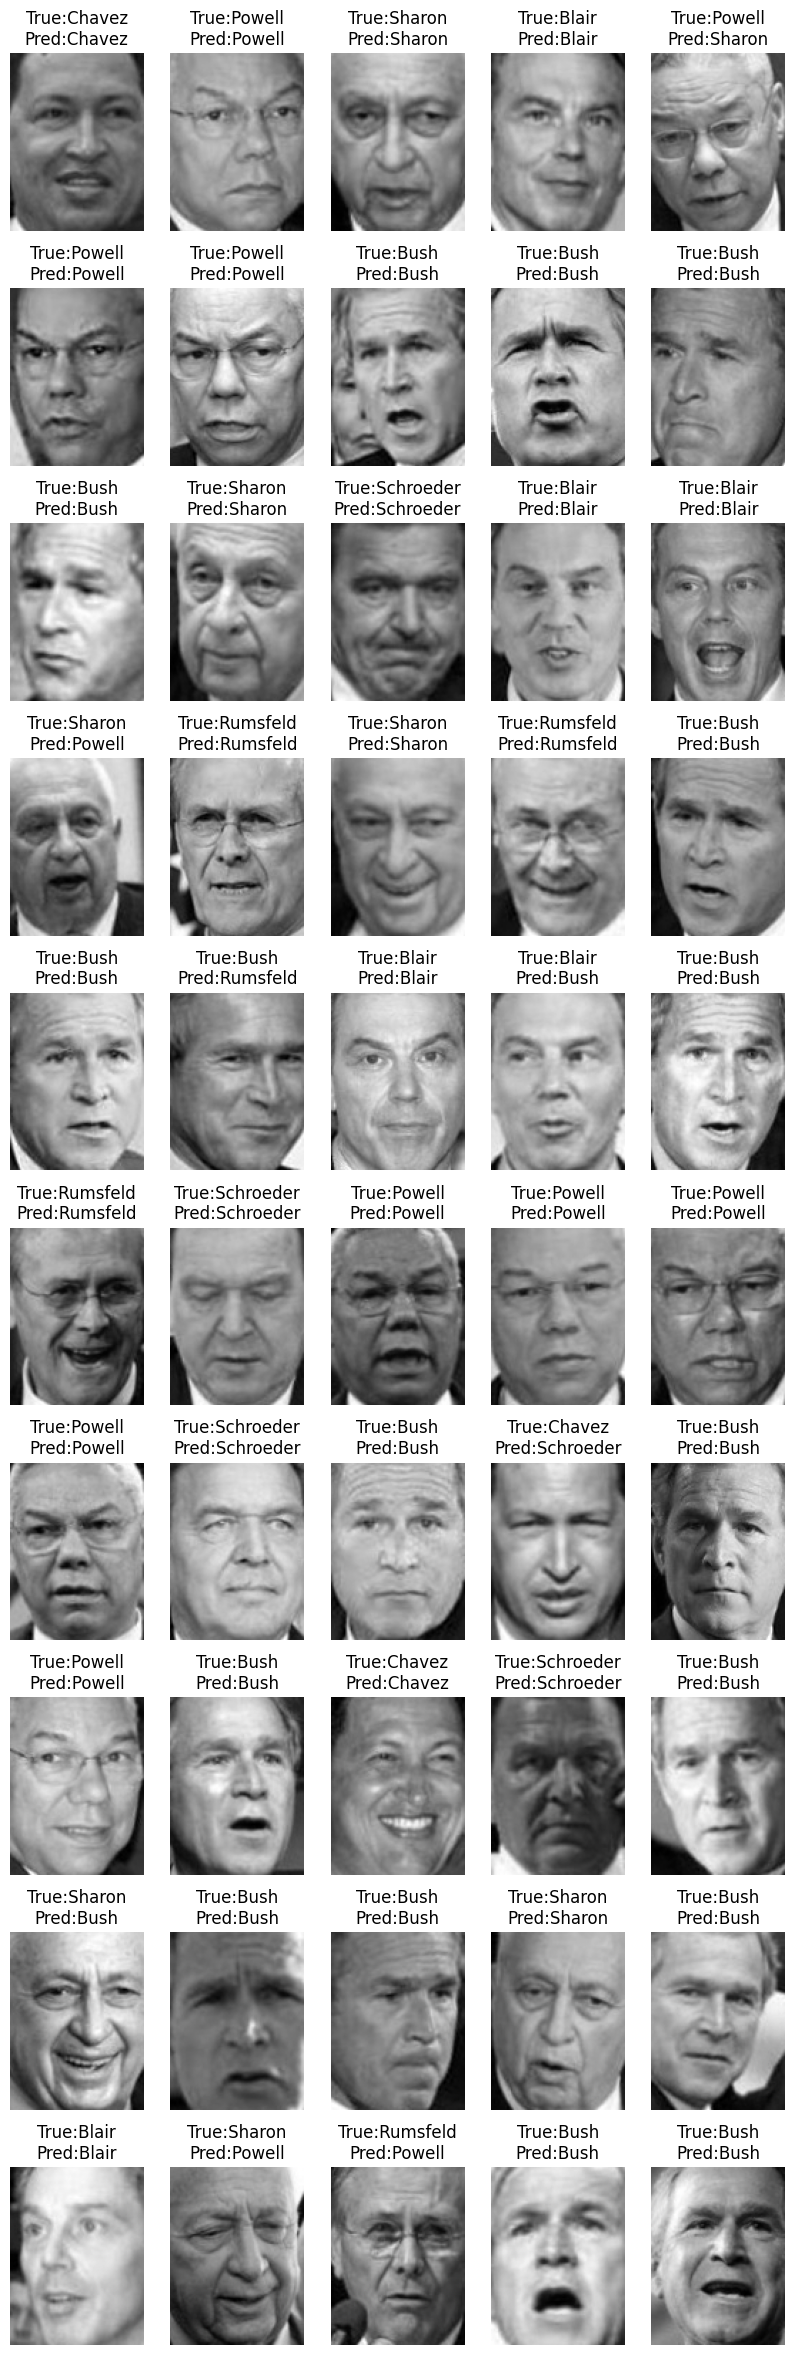

In [19]:
#算法的预测值
y_pred = svc.predict(x_pca_test)
plt.figure(figsize=(5*2,10*3))
for i in range(50):
    plt.subplot(10,5,i+1) #子视图
    #姓名
    true_name = target_names[y_test[i]].split(' ')[-1]
    predict_name = target_names[y_pred[i]].split(' ')[-1]
    plt.title('True:%s\nPred:%s' % (true_name,predict_name))
    plt.imshow(faces_test[i],cmap='gray')
    plt.axis('off') #刻度关闭

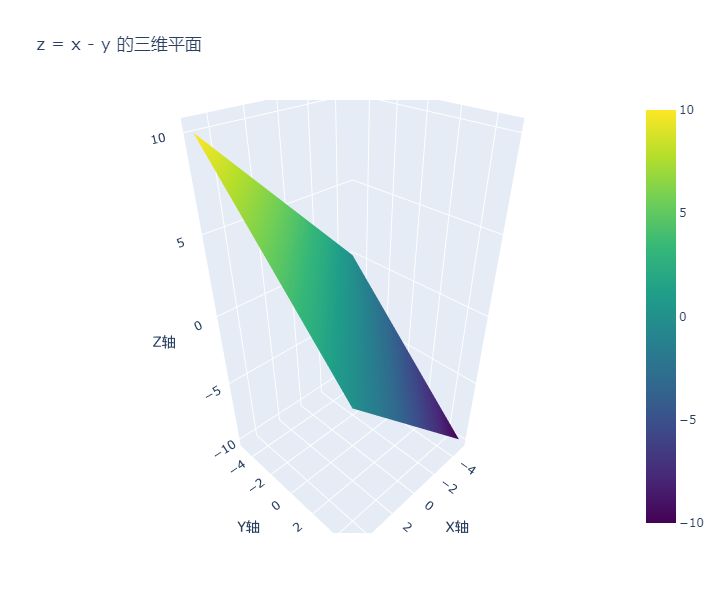

In [1]:
import plotly.graph_objects as go
import numpy as np

# 创建数据
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = X - Y

# 创建3D表面图
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])

fig.update_layout(
    title='z = x - y 的三维平面',
    scene=dict(
        xaxis_title='X轴',
        yaxis_title='Y轴',
        zaxis_title='Z轴'
    ),
    width=800,
    height=600
)

fig.show()

D:\AI\pytroch_learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.

D:\AI\pytroch_learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49}) missing from font(s) DejaVu Sans.

D:\AI\pytroch_learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.

D:\AI\pytroch_learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.

D:\AI\pytroch_learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.



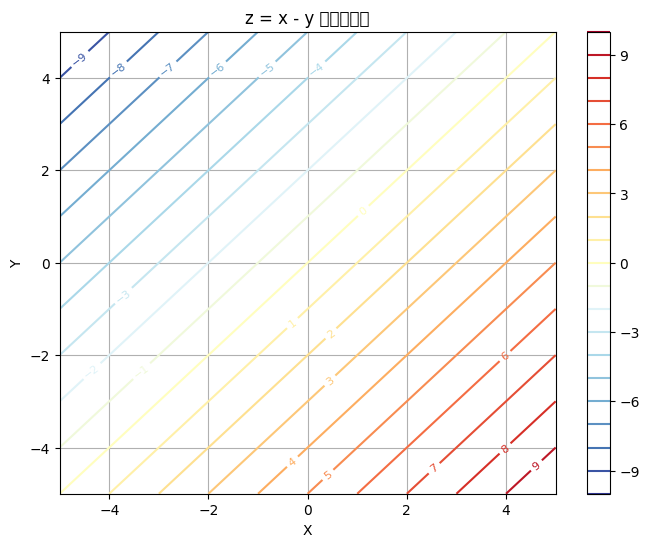

In [4]:
# 等高线图
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, 20, cmap='RdYlBu_r')
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('z = x - y 的等高线图')
plt.colorbar(contour)
plt.grid(True)
plt.show()